# **Evaluacion final modulo 3**

### **Enunciado del Problema:**


---


Se está haciendo un estudio de propiedades en la octava región del país y a Usted le han encargado
analizar un set de datos provisto por el ministerio de vivienda y urbanismo. El data set, tiene información
respecto a los precios de las propiedades y la caracterización de los siguientes atributos:


*  CRIM: Tasa de criminalidad per cápita del sector

* ZN: Proporción de suelo residencial para lotes sobre 25,000 sq ft
* INDUS: Proporción de negocios no-retail por sector
* CHAS: 1 si el tramo limita con el Río Biobío, caso contrario, 0
* NOX: Concentración óxido nítrico (part per 10 million)
* RM: Promedio número de dormitorios por vivienda
* AGE: Proporción de viviendas ocupadas por sus propietarios construidas previo a 1940
* DIS: Distancias ponderadas a cinco centros de empleo de Boston
* RAD: Índice de accesibilidad a carreteras radiales
* TAX: Tasa de impuesto a la propiedad de valor total por $ 10,000
* PTRATIO: Proporción alumno-profesor por ciudad
* B: 1000 (Bk - 0,63) ², donde Bk es la proporción de (personas de otras etnias) por sector
* LSTAT: Porcentaje de menor estatus de la población 1


## **Se le solicita, que en su análisis de datos, incorpore como mínimo lo siguiente:**

1. Realice un modelamiento regresivo multivariable con selección de variables hacia adelante
(Fordward Stepwise Regression) ¿Qué nivel de ajuste tiene el modelo? ¿Cuáles son las variables que
más inciden en el precio de una propiedad?.
2. ¿Cambiando el método de selección de variables fue posible superar el mejor R2 ajustado
de 0.735? (valor reportado en el notebook guía calculado con el método de eliminación hacia atrás,
Backward Stepwise Regression). ¿Se encontró un modelo diferente o llegó al mismo modelo?, explique posibles causas

# 1. Apertura de librerias y lecutura de dataframe


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy import stats
import statsmodels.api as sm

#Hacemos la lectura de todas las librerias posibles para el analisis del dataframe

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Sakuta97/codes/07516740a0ebfb0429ed73c7f3f9847a9b381d75/precios-propiedades.csv?token=GHSAT0AAAAAACVUQJMNJO4HGUNYSCGUUWQMZVNT43Q')
#Hacemos la lectura del dataframe desde el repositorio en GitHub

# 2.Analisis exploratorio

In [5]:
df #Analizamos la estructura del dataframe y vemos su contenido en su cantidad filas/columnas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
df.info() # Analizamos todas las categorias que contiene el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.head(5) #Vemos los primeros 5 valores del DataFrame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.tail(5) #Vemos los ultimos 5 valores del DataFrame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [9]:
df.sample(n=10) #Vemos una muestra de 10 datos al azar en el DataFrame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6
325,0.19186,0.0,7.38,0.0,0.493,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08,24.6
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01,21.8
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87,23.1
196,0.04011,80.0,1.52,0.0,0.404,7.287,34.1,7.3090,2.0,329.0,12.6,396.90,4.08,33.3
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9
159,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
263,0.82526,20.0,3.97,0.0,0.647,7.327,94.5,2.0788,5.0,264.0,13.0,393.42,11.25,31.0
337,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56,18.5


In [10]:
df.describe() #Realizamos un analisis estadistico preliminar del DataFrame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 3. Analisis de valores nulos

In [11]:
df.isnull() #Realizamos un analisis de valores nulos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum() #Realizamos una sumatoria de todos valores nulos

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [13]:
df.isnull().sum().sum() #Realizamos una sumatoria de todos valores nulos

0

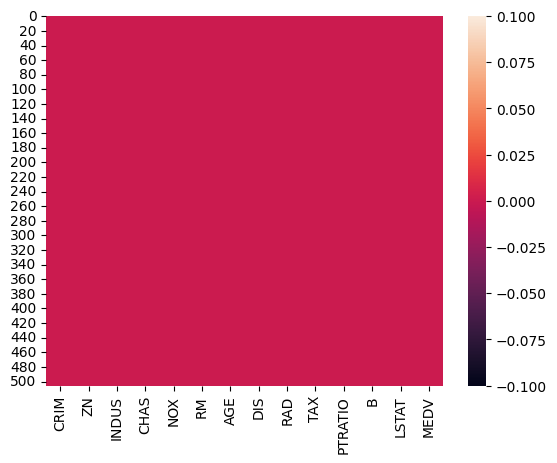

In [14]:
sns.heatmap(df.isnull(), cbar=True)
plt.show() #Generamos un mapa de calor para determinar la concentracion de valores nulos


# 4. Analisis de outliders

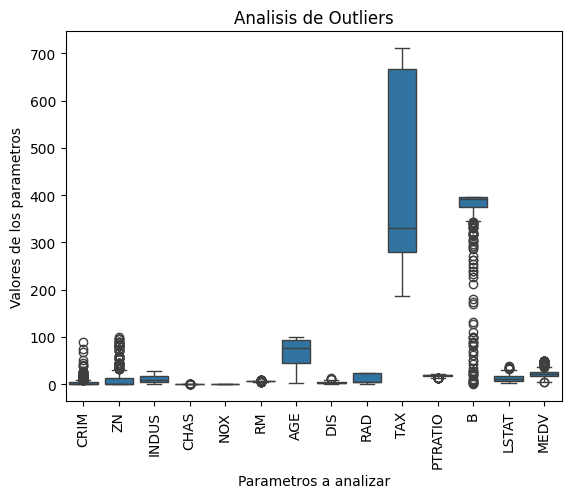

In [15]:
df_box=pd.melt(df)
sns.boxplot(x='variable',y='value',data=df_box)
plt.title('Analisis de Outliers')
plt.xlabel('Parametros a analizar')
plt.ylabel('Valores de los parametros')
plt.xticks(rotation=90)
plt.show() #Realizamos un analisis de outliders



In [16]:
columns_to_analyze = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

for column in columns_to_analyze:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Column {column}:")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print()

Column CRIM:
  Q1: 0.08204499999999999
  Q3: 3.6770825
  IQR: 3.5950375

Column ZN:
  Q1: 0.0
  Q3: 12.5
  IQR: 12.5

Column INDUS:
  Q1: 5.19
  Q3: 18.1
  IQR: 12.91

Column CHAS:
  Q1: 0.0
  Q3: 0.0
  IQR: 0.0

Column NOX:
  Q1: 0.449
  Q3: 0.624
  IQR: 0.175

Column RM:
  Q1: 5.8854999999999995
  Q3: 6.6235
  IQR: 0.7380000000000004

Column AGE:
  Q1: 45.025
  Q3: 94.07499999999999
  IQR: 49.04999999999999

Column DIS:
  Q1: 2.100175
  Q3: 5.1884250000000005
  IQR: 3.0882500000000004

Column RAD:
  Q1: 4.0
  Q3: 24.0
  IQR: 20.0

Column TAX:
  Q1: 279.0
  Q3: 666.0
  IQR: 387.0

Column PTRATIO:
  Q1: 17.4
  Q3: 20.2
  IQR: 2.8000000000000007

Column B:
  Q1: 375.3775
  Q3: 396.225
  IQR: 20.847500000000025

Column LSTAT:
  Q1: 6.949999999999999
  Q3: 16.955000000000002
  IQR: 10.005000000000003

Column MEDV:
  Q1: 17.025
  Q3: 25.0
  IQR: 7.975000000000001



In [17]:
columns_to_analyze = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
for column in columns_to_analyze:
  z = np.abs(stats.zscore(df[column])) # Calculate z-score for each column individually
  outliers = np.where(z > 3)  # Identify outliers with z-score > 3
  formatted_outliers = np.array2string(outliers[0], separator=', ')
  print(f"Outliers in column {column}: {outliers}") #Print the outliers for each column
  print()


Outliers in column CRIM: (array([380, 398, 404, 405, 410, 414, 418, 427]),)

Outliers in column ZN: (array([ 55,  56,  57, 199, 200, 201, 202, 203, 204, 256, 283, 284, 347,
       353]),)

Outliers in column INDUS: (array([], dtype=int64),)

Outliers in column CHAS: (array([142, 152, 154, 155, 160, 162, 163, 208, 209, 210, 211, 212, 216,
       218, 219, 220, 221, 222, 234, 236, 269, 273, 274, 276, 277, 282,
       283, 356, 357, 358, 363, 364, 369, 370, 372]),)

Outliers in column NOX: (array([], dtype=int64),)

Outliers in column RM: (array([225, 257, 262, 364, 365, 367, 374, 406]),)

Outliers in column AGE: (array([], dtype=int64),)

Outliers in column DIS: (array([351, 352, 353, 354, 355]),)

Outliers in column RAD: (array([], dtype=int64),)

Outliers in column TAX: (array([], dtype=int64),)

Outliers in column PTRATIO: (array([], dtype=int64),)

Outliers in column B: (array([102, 410, 411, 412, 415, 416, 418, 419, 423, 424, 425, 426, 427,
       429, 431, 436, 437, 438, 445, 450, 

# 5. Formulacion de modelo multivariable

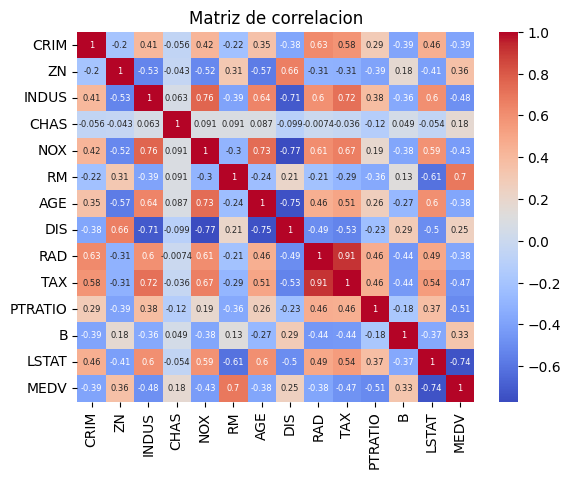

In [21]:
correlation_matrix= df.corr() #Realizamos un analisis de correlacion entre las variables
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',annot_kws={"size":6})
plt.title('Matriz de correlacion')
plt.show()

In [37]:
#Efectuamos la escritura del codigo
#df['TAX'],df['CRIM'],df['ZN'],df['INDUS'],df['CHAS'],df['NOX'],df['RM'],df['AGE'],df['DIS'],df['RAD'],df['TAX'],df['PTRATIO'],df['B'],df['LSTAT
X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = df['MEDV']
def forward_selection(X, y):
    initial_features = []   #Generamos una lista vacia donde vamos a contener la informacion seleccionada por el modelo
    best_features = []      #Generamos una lista vacia donde vamos se tendra a los mejores candidatos
    remaining_features = list(X.columns) #Aqui indicamos donde esta la lista seleccionada donde se seleccionaran los valores
    best_adj_r2 = -np.inf  #Aca determinamos el ajuste del coeficiente de correlacion R2

    while remaining_features:
        candidate_features = []
        for new_feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[initial_features + [new_feature]])).fit()
            candidate_features.append((new_feature, model.rsquared_adj))

        candidate_features.sort(key=lambda x: x[1], reverse=True)
        best_candidate = candidate_features[0]

        if best_candidate[1] > best_adj_r2:
            best_adj_r2 = best_candidate[1]
            best_features.append(best_candidate[0])
            initial_features.append(best_candidate[0])
            remaining_features.remove(best_candidate[0])
        else:
            break

    final_model = sm.OLS(y, sm.add_constant(X[best_features])).fit()
    return final_model

final_model = forward_selection(X, y)
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          5.54e-137
Time:                        21:54:37   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

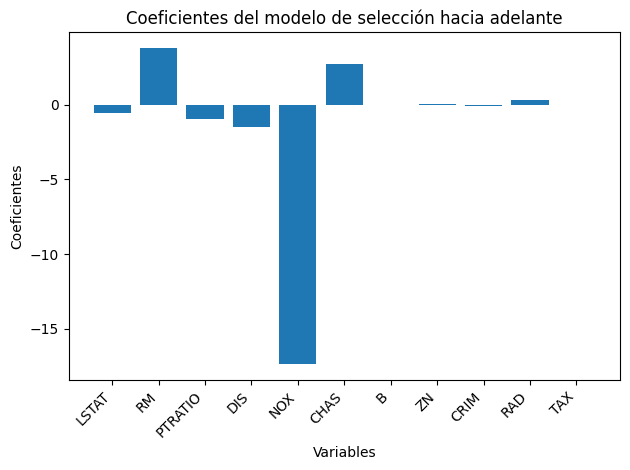

In [36]:
coefs = final_model.params[1:]  # Excluimos el intercepto

# Nombres de las variables seleccionadas
var_names = coefs.index

# Crear un gráfico de barras de los coeficientes
plt.bar(var_names, coefs)
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Coeficientes del modelo de selección hacia adelante')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

In [39]:
# Definimos las variables predictoras y la variable objetivo
X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = df['MEDV']

# Añadimos una constante a las variables predictoras (para el término de intercepto)
X = sm.add_constant(X)

# Creamos el modelo inicial con todas las variables
model = sm.OLS(y, X).fit()

# Realizamos la selección paso a paso hacia atrás
def backward_elimination(model, X, p_value_threshold=0.05): #Added X as a parameter
    """
    Realiza la selección paso a paso hacia atrás.

    Args:
        model: El modelo inicial.
        X: The predictor variables. #Added documentation for X
        p_value_threshold: El umbral de p-valor para eliminar variables.

    Returns:
        El modelo final.
    """
    while True:
        # Obtenemos los p-valores de las variables
        p_values = model.pvalues[1:]  # Excluimos el intercepto

        # Encontramos la variable con el p-valor más alto
        max_p_value = p_values.max()
        max_p_value_index = p_values.idxmax()

        # Si el p-valor más alto es mayor que el umbral, eliminamos la variable
        if max_p_value > p_value_threshold:
            X_new = X.drop(max_p_value_index, axis=1)
            model = sm.OLS(y, X_new).fit()
            X = X_new # Now we are modifying the X that is passed in
        else:
            break

    return model

# Aplicamos la función al modelo inicial
final_model = backward_elimination(model, X) #Pass X to the function

# Imprimimos el resumen del modelo final
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          5.54e-137
Time:                        22:01:24   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

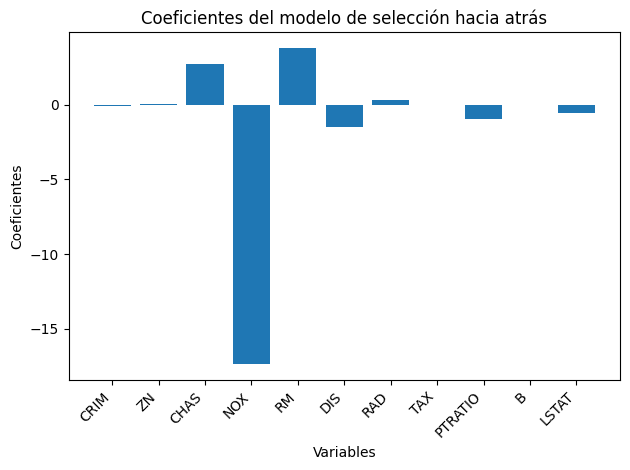

In [40]:
import matplotlib.pyplot as plt

# Obtenemos los coeficientes del modelo final (excluyendo el intercepto)
coefs = final_model.params[1:]

# Obtenemos los nombres de las variables seleccionadas
var_names = coefs.index

# Creamos un gráfico de barras de los coeficientes
plt.bar(var_names, coefs)
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Coeficientes del modelo de selección hacia atrás')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

 Al realizar ambos metodos para ambos modelos multivariables se dio como resultado que ambos R-cuadrado del modelo no tuvieron diferencias significativas.

 Las razones por las cuales probablemente el problema del modelo no sufrio cambios importantes debio ser por la fuerte correlaciones de algunas variables, como por ejemplo en el caso de NOX, este tenia una fuerte correlacion negativa. Lo que podria implicar en una influencia determinante para el modelo de este parametro.

 La eliminacion de este parametro podria cambiar el comportamiento de este modelo enrelacion a los metodos anterioremente descritos dejandose como una hipotesis al problema.

In [45]:
X = df[['CRIM','ZN','INDUS','CHAS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = df['MEDV']
def forward_selection(X, y):
    initial_features = []   #Generamos una lista vacia donde vamos a contener la informacion seleccionada por el modelo
    best_features = []      #Generamos una lista vacia donde vamos se tendra a los mejores candidatos
    remaining_features = list(X.columns) #Aqui indicamos donde esta la lista seleccionada donde se seleccionaran los valores
    best_adj_r2 = -np.inf  #Aca determinamos el ajuste del coeficiente de correlacion R2

    while remaining_features:
        candidate_features = []
        for new_feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[initial_features + [new_feature]])).fit()
            candidate_features.append((new_feature, model.rsquared_adj))

        candidate_features.sort(key=lambda x: x[1], reverse=True)
        best_candidate = candidate_features[0]

        if best_candidate[1] > best_adj_r2:
            best_adj_r2 = best_candidate[1]
            best_features.append(best_candidate[0])
            initial_features.append(best_candidate[0])
            remaining_features.remove(best_candidate[0])
        else:
            break

    final_model = sm.OLS(y, sm.add_constant(X[best_features])).fit()
    return final_model

final_model = forward_selection(X, y)
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          2.27e-131
Time:                        22:26:21   Log-Likelihood:                -1509.7
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     493   BIC:                             3100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5000      4.364      5.385      0.0

In [44]:
X = df[['CRIM','ZN','INDUS','CHAS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = df['MEDV']

# Añadimos una constante a las variables predictoras (para el término de intercepto)
X = sm.add_constant(X)

# Creamos el modelo inicial con todas las variables
model = sm.OLS(y, X).fit()

# Realizamos la selección paso a paso hacia atrás
def backward_elimination(model, X, p_value_threshold=0.05): #Added X as a parameter
    """
    Realiza la selección paso a paso hacia atrás.

    Args:
        model: El modelo inicial.
        X: The predictor variables. #Added documentation for X
        p_value_threshold: El umbral de p-valor para eliminar variables.

    Returns:
        El modelo final.
    """
    while True:
        # Obtenemos los p-valores de las variables
        p_values = model.pvalues[1:]  # Excluimos el intercepto

        # Encontramos la variable con el p-valor más alto
        max_p_value = p_values.max()
        max_p_value_index = p_values.idxmax()

        # Si el p-valor más alto es mayor que el umbral, eliminamos la variable
        if max_p_value > p_value_threshold:
            X_new = X.drop(max_p_value_index, axis=1)
            model = sm.OLS(y, X_new).fit()
            X = X_new # Now we are modifying the X that is passed in
        else:
            break

    return model

# Aplicamos la función al modelo inicial
final_model = backward_elimination(model, X) #Pass X to the function

# Imprimimos el resumen del modelo final
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     132.4
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          5.75e-133
Time:                        22:26:11   Log-Likelihood:                -1510.9
No. Observations:                 506   AIC:                             3044.
Df Residuals:                     495   BIC:                             3090.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6054      4.325      5.227      0.0

 Se demostro que la eliminacion de la categoria NOX reduce de forma no significativa el R-cuadrado en ambos modelos, pero que no generan diferencias significativas estadisticas, lo que indica que la variables no tienen una gran poder predictivo por si mismas, lo que indica que este modelo si o si su naturaleza multivariable corresponde al objetivo inicial propuesto.